In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [128]:
df = pd.read_csv("SBIN.csv",index_col = 'Date',parse_dates=True)
df.dropna(subset='close', inplace=True)
df.head()

series    OPEN   HIGH     LOW  PREV. CLOSE      ltp   close
Date                                                                  
2022-04-25     EQ  495.00  499.2  490.05        500.60  495.00  494.75
2022-04-26     EQ  499.00  507.9  498.45        494.75  505.50  505.50
2022-04-27     EQ  500.00  502.8  491.85        505.50  497.85  497.25
2022-04-28     EQ  499.15  510.0  496.50        497.25  507.70  507.50
2022-04-29     EQ  508.10  512.5  494.00        507.50  495.90  496.30

In [129]:
df.shape

(247, 7)

<Axes: xlabel='Date'>

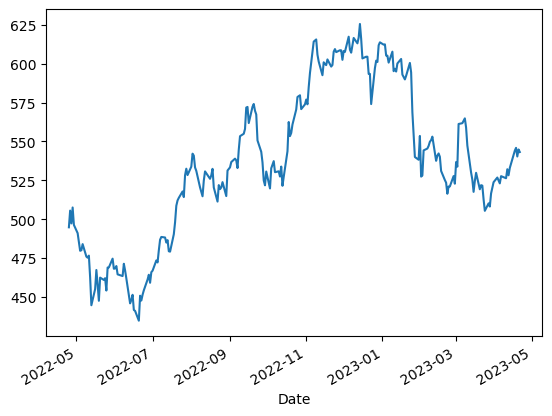

In [130]:
df['close'].plot()

In [46]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
    
    dftest = adfuller(dataset, autolag = 'AIC')
    print("1: ADF: ", dftest[0])
    print("2: P-value: ", dftest[1])
    print("3: Num of Lags ", dftest[2])
    print("4: Num of Observations Used for Regression and Critical Value ", dftest[3])
    print("5: Critical Values :")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

In [47]:
ad_test(df['close'])

1: ADF:  -1.4505509174057933
2: P-value:  0.5578160603762959
3: Num of Lags  0
4: Num of Observations Used for Regression and Critical Value  246
5: Critical Values :
	 1% : -3.457215237265747
	 5% : -2.873361841566324
	 10% : -2.5730700760129555


In [131]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [132]:
stepwise_fit =  auto_arima(df['close'], trace= True, suppress_warnings = True)
stepwise_fit.summary()
#Gives that set of (p,d,q) where AIC is minimum

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1742.691, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1744.674, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1744.673, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1740.830, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1744.377, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.902 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  247
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -869.415
Date:                Fri, 05 May 2023   AIC                           1740.830
Time:                        20:14:24   BIC                           1744.335
Sample:                             0   HQIC                          1742.241
                                - 247                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        68.7541      5.122     13.423      0.000      58.715      78.793
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                10.38
Prob(Q):                              0.90   Prob(JB):                         0.01
Heteroskedasticity (H):               1.54   Skew:                            -0.17
Prob(H) (two-sided):                  0.05   Kurtosis:                         3.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [50]:
train = df[:int(len(df)*.7)]
test = df[int(len(df)*.7):]
print(train.shape,test.shape)

(172, 7) (75, 7)


In [140]:
model = ARIMA(train['close'], order=(2,1,0))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                  172
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -597.372
Date:                Fri, 05 May 2023   AIC                           1200.743
Time:                        20:18:16   BIC                           1210.168
Sample:                             0   HQIC                          1204.567
                                - 172                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0284      0.069     -0.412      0.680      -0.163       0.107
ar.L2         -0.0547      0.084     -0.653      0.514      -0.219       0.109
sigma2        63.3633      7.215      8.782      0.000      49.223      77.504
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.10
Prob(Q):                              0.94   Prob(JB):                         0.95
Heteroskedasticity (H):               1.20   Skew:                             0.03
Prob(H) (two-sided):                  0.49   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [141]:
start = len(train)
end = len(train)+len(test)-1
pred = model.predict(start=start,end=end,type='levels')
pred.index = df.index[start:end+1]
print(pred)

Date
2022-12-30    611.541079
2023-01-02    610.960787
2023-01-03    610.991426
2023-01-04    611.022277
2023-01-05    611.019726
                 ...    
2023-04-17    611.018365
2023-04-18    611.018365
2023-04-19    611.018365
2023-04-20    611.018365
2023-04-21    611.018365
Name: predicted_mean, Length: 75, dtype: float64


<Axes: xlabel='Date'>

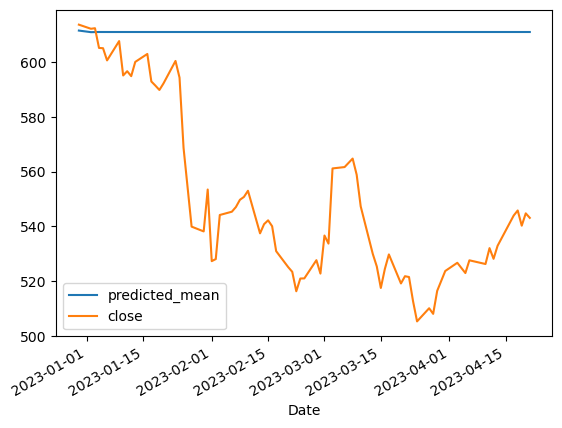

In [142]:
pred.plot(legend=True)
test['close'].plot(legend=True)

In [93]:
test['close'].mean()

549.9900000000001

In [136]:
from math import sqrt
rmse = sqrt(mean_squared_error(pred,test['close']))
print(rmse)

69.28011138366715


In [95]:
df.tail()

series    OPEN    HIGH     LOW  PREV. CLOSE      ltp   close
Date                                                                   
2023-04-17     EQ  528.00  545.00  528.00        532.95  544.40  544.00
2023-04-18     EQ  545.35  548.50  540.50        544.00  545.25  545.85
2023-04-19     EQ  544.00  547.50  538.25        545.85  539.40  540.30
2023-04-20     EQ  541.20  545.45  536.65        540.30  544.35  544.80
2023-04-21     EQ  545.00  546.40  539.70        544.80  542.30  543.15

In [143]:
model2 = ARIMA(df['close'], order=(2,1,0))
model2 = model2.fit()

In [144]:
index_future_dates = pd.date_range(start="2023-04-21",end="2023-05-21")
pred = model2.predict(start=len(df), end=len(df)+30, type='levels').rename('ARIMA Predictions')
pred.index = index_future_dates
print(pred)

2023-04-21    542.979695
2023-04-22    543.034909
2023-04-23    543.041287
2023-04-24    543.039446
2023-04-25    543.039209
2023-04-26    543.039270
2023-04-27    543.039279
2023-04-28    543.039277
2023-04-29    543.039277
2023-04-30    543.039277
2023-05-01    543.039277
2023-05-02    543.039277
2023-05-03    543.039277
2023-05-04    543.039277
2023-05-05    543.039277
2023-05-06    543.039277
2023-05-07    543.039277
2023-05-08    543.039277
2023-05-09    543.039277
2023-05-10    543.039277
2023-05-11    543.039277
2023-05-12    543.039277
2023-05-13    543.039277
2023-05-14    543.039277
2023-05-15    543.039277
2023-05-16    543.039277
2023-05-17    543.039277
2023-05-18    543.039277
2023-05-19    543.039277
2023-05-20    543.039277
2023-05-21    543.039277
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: xlabel='Date'>

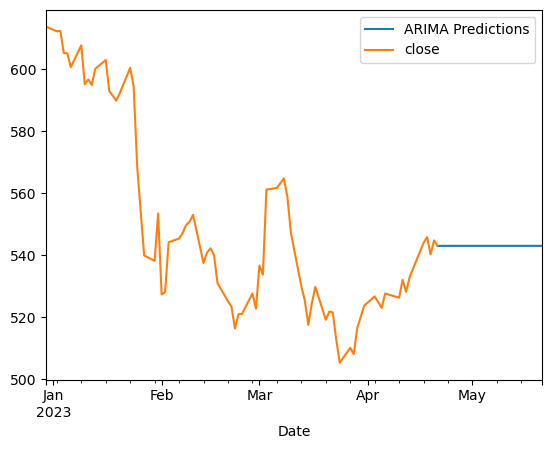

In [145]:
pred.plot(legend=True)
test['close'].plot(legend=True)

# SARIMA

In [146]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [148]:
sarima = SARIMAX(train['close'], order=(1,1,0),seasonal_order=(1,1,0,12))
model3 = sarima.fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              close   No. Observations:                  172
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -583.671
Date:                            Fri, 05 May 2023   AIC                           1173.341
Time:                                    20:21:56   BIC                           1182.548
Sample:                                         0   HQIC                          1177.080
                                            - 172                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0341      0.079     -0.429      0.668      -0.190       0.122
ar.S.L12      -0.5548      0.071     -7.786      0.000      -0.694      -0.415
sigma2        87.8985     10.850      8.101      0.000      66.632     109.165
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.81   Prob(JB):                         0.94
Heteroskedasticity (H):               1.12   Skew:                            -0.05
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
start = len(train)
end = len(train)+len(test)-1
predictions = model3.predict(start=start,end=end,type='levels')
predictions.index = df.index[start:end+1]
print(pred)
#predictions = model3.predict()

2023-04-21    542.979695
2023-04-22    543.034909
2023-04-23    543.041287
2023-04-24    543.039446
2023-04-25    543.039209
2023-04-26    543.039270
2023-04-27    543.039279
2023-04-28    543.039277
2023-04-29    543.039277
2023-04-30    543.039277
2023-05-01    543.039277
2023-05-02    543.039277
2023-05-03    543.039277
2023-05-04    543.039277
2023-05-05    543.039277
2023-05-06    543.039277
2023-05-07    543.039277
2023-05-08    543.039277
2023-05-09    543.039277
2023-05-10    543.039277
2023-05-11    543.039277
2023-05-12    543.039277
2023-05-13    543.039277
2023-05-14    543.039277
2023-05-15    543.039277
2023-05-16    543.039277
2023-05-17    543.039277
2023-05-18    543.039277
2023-05-19    543.039277
2023-05-20    543.039277
2023-05-21    543.039277
Freq: D, Name: ARIMA Predictions, dtype: float64


In [122]:
rmse = sqrt(mean_squared_error(predictions,test['close']))
print(rmse)

64.4636514063699


<Axes: xlabel='Date'>

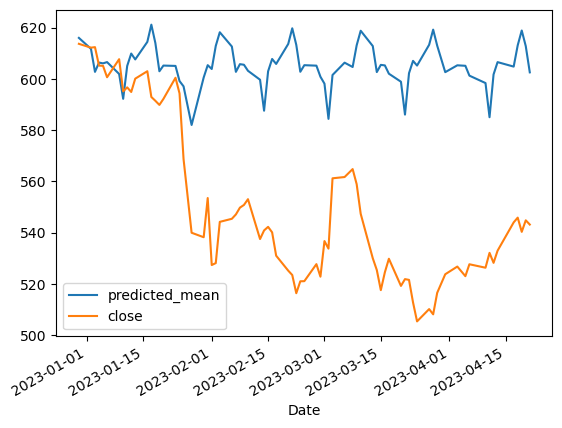

In [150]:
predictions.plot(legend=True)
test['close'].plot(legend=True)

In [151]:
model4 = SARIMAX(df['close'], order=(1,1,0),seasonal_order=(1,1,0,12))
model4 = model4.fit()

In [152]:
index_future_dates = pd.date_range(start="2023-04-21",end="2023-05-21")
pred = model4.predict(start=len(df), end=len(df)+30, type='levels').rename('SARIMA Predictions')
pred.index = index_future_dates
print(pred)

2023-04-21    540.494716
2023-04-22    542.326022
2023-04-23    547.315073
2023-04-24    541.140107
2023-04-25    545.297010
2023-04-26    543.274835
2023-04-27    540.956911
2023-04-28    542.383059
2023-04-29    545.771832
2023-04-30    542.047495
2023-05-01    548.581805
2023-05-02    551.574205
2023-05-03    551.868819
2023-05-04    550.788815
2023-05-05    555.601012
2023-05-06    551.942834
2023-05-07    556.956807
2023-05-08    553.955124
2023-05-09    555.323957
2023-05-10    561.770079
2023-05-11    564.356200
2023-05-12    559.679565
2023-05-13    565.152742
2023-05-14    565.723583
2023-05-15    564.479477
2023-05-16    564.918064
2023-05-17    569.822512
2023-05-18    564.851532
2023-05-19    569.418441
2023-05-20    566.927688
2023-05-21    566.373442
Freq: D, Name: SARIMA Predictions, dtype: float64


<Axes: xlabel='Date'>

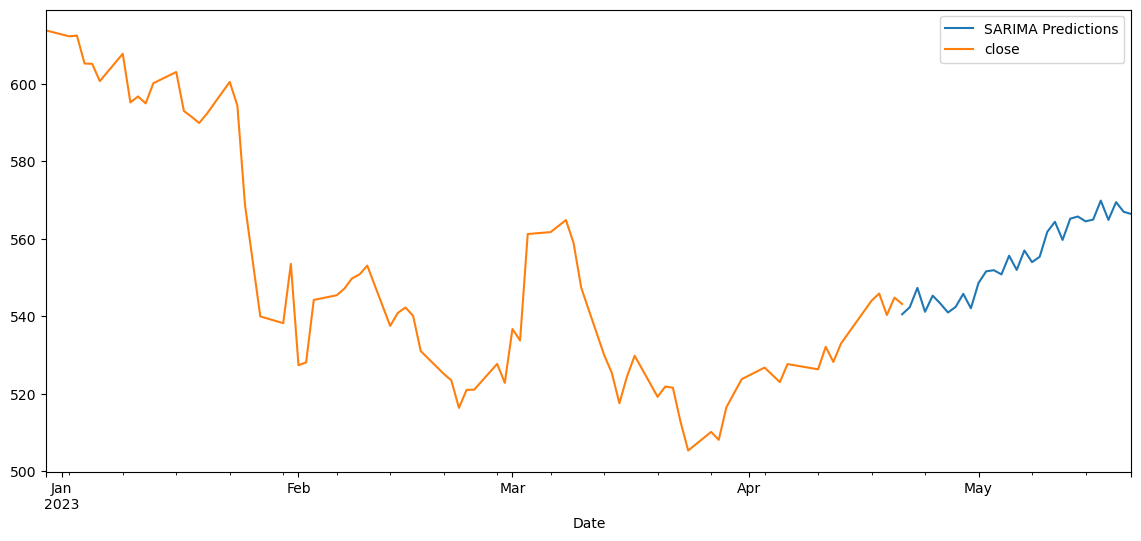

In [153]:
plt.figure(figsize=(14,6))
pred.plot(legend=True)
test['close'].plot(legend=True)